# Introduction into Graphs

## 1. Grafos básicos 

### 1.1 Librerias

In [1]:
# Librerias
import networkx as nx
import pygraphviz as pgv
from IPython.display import SVG
import pandas as pd
import matplotlib.pyplot as plt

### 1.2 Creacion del Grafo

In [3]:
G1=nx.Graph()
# Carga de nodos:
G1.add_node("v1")
G1.add_node("v2")
G1.add_node("v3")
G1.add_node("v4")
G1.add_node("v5")
# Carga de aristas:
G1.add_edge("v1","v2",name="a1")
G1.add_edge("v1","v3",name="a2")
G1.add_edge("v2","v3",name="a3")
G1.add_edge("v2","v4",name="a4")
G1.add_edge("v2","v5",name="a6")
G1.add_edge("v3","v4",name="a5")
G1.add_edge("v3","v5",name="a7")

### 1.3 Impresion Grafo

{('v1', 'v2'): Text(-0.3320160495795274, 0.5277089386609066, 'a1'),
 ('v1', 'v3'): Text(-0.541595276175368, 0.3184124800682558, 'a2'),
 ('v2', 'v3'): Text(-0.06236918185727182, 0.05797936397617709, 'a3'),
 ('v2', 'v4'): Text(0.04263296356124502, -0.366362088715586, 'a4'),
 ('v2', 'v5'): Text(0.5725673349834074, 0.18158751993174438, 'a6'),
 ('v3', 'v4'): Text(-0.1669462630345956, -0.575658547308237, 'a5'),
 ('v3', 'v5'): Text(0.3629881083875668, -0.027708938660906526, 'a7')}

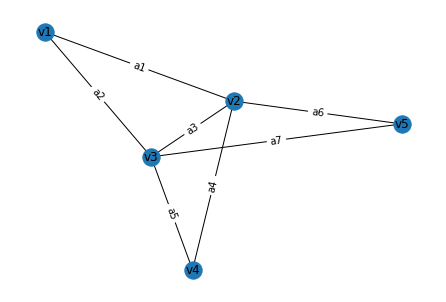

In [4]:
# Networkx
pos = nx.spring_layout(G1)
nx.draw(G1,pos,with_labels = True)
nx.draw_networkx_edge_labels(G1,pos,edge_labels=nx.get_edge_attributes(G1,'name'))

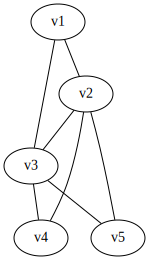

In [9]:
# Pygraphviz
A = nx.nx_agraph.to_agraph(G1)
A.layout('dot')
A.draw('web.svg')
SVG('web.svg')

### 1.4. Guardar y cargar el grafo

Un grafo en NetworkX puede almacenarse en varios formatos: como GML, JSON, Pajek, YAML, Pickle. Para ello, existen funciones Write.

#### Persisto y cargo grafo con Pickle

In [10]:
# Grabado en Pickle
archivo="G1.pkl"
nx.write_gpickle(G1, archivo)
# Demoramos 1 seg.
G2=nx.read_gpickle(archivo)

#### Dibujo el grafo recuperado

{('v1', 'v2'): Text(-0.3320160495795274, 0.5277089386609066, 'a1'),
 ('v1', 'v3'): Text(-0.541595276175368, 0.3184124800682558, 'a2'),
 ('v2', 'v3'): Text(-0.06236918185727182, 0.05797936397617709, 'a3'),
 ('v2', 'v4'): Text(0.04263296356124502, -0.366362088715586, 'a4'),
 ('v2', 'v5'): Text(0.5725673349834074, 0.18158751993174438, 'a6'),
 ('v3', 'v4'): Text(-0.1669462630345956, -0.575658547308237, 'a5'),
 ('v3', 'v5'): Text(0.3629881083875668, -0.027708938660906526, 'a7')}

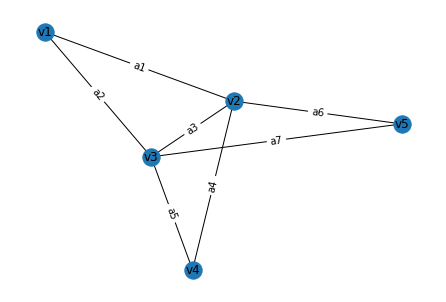

In [11]:
# Grafo recuperado
nx.draw(G2,pos,with_labels = True) # se uso mismo "pos" para que queden en el mismo lugar
nx.draw_networkx_edge_labels(G2,pos,edge_labels=nx.get_edge_attributes(G2,'name'))

### 1.5. Cambio estilos al grafo

{'v1': Text(-0.8112421438976236, 0.7881420547529854, 'v1'),
 'v2': Text(0.14721004473856877, 0.267275822568828, 'v2'),
 'v3': Text(-0.2719484084531124, -0.1513170946164738, 'v3'),
 'v4': Text(-0.06194411761607874, -1.0, 'v4'),
 'v5': Text(0.997924625228246, 0.09589921729466075, 'v5')}

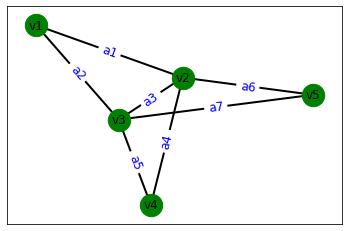

In [12]:
# Estilos:
nx.draw_networkx_nodes(G2, pos, node_size=500, node_color='green') #nodos
nx.draw_networkx_edges(G2, pos, width=2, alpha=1, edge_color='black')
nx.draw_networkx_edge_labels(G2,pos,edge_labels={(u,v):G2[u][v]['name'] for u,v in G2.edges()} ,font_color='blue',font_size=12)
nx.draw_networkx_labels(G2, pos, font_size=12, font_family='sans-serif') 

### 1.6. Conectividad

In [83]:
# Ver si el grafo es conexo:
print('El grafo es conexo: ',nx.is_connected(G2))

El grafo es conexo:  True


In [82]:
# Cantidad de componentes conexas:
print('Cantidad de componentes: ',nx.number_connected_components(G2))

Cantidad de componentes:  1


## 2. Vertices y aristas

### 2.1. Vertices y aristas con Pandas

In [13]:
# Dataframe con vertices y aristas
dfGrafo=pd.DataFrame(nx.get_edge_attributes(G2, "name").items(), columns=["vertices","aristas"])
print(dfGrafo)

   vertices aristas
0  (v1, v2)      a1
1  (v1, v3)      a2
2  (v2, v3)      a3
3  (v2, v4)      a4
4  (v2, v5)      a6
5  (v3, v4)      a5
6  (v3, v5)      a7


### 2.2. Acerca de los Vertices

In [14]:
# Los Vertices
print('Los vertices del grafo:',G2.nodes)
print('Cantidad de Vertices:', G2.order())
# El grado de los vértices:
print('Grado de los Vertices: ',G2.degree())
print('Grado del Vertice v1:', G2.degree('v1'))

Los vertices del grafo: ['v1', 'v2', 'v3', 'v4', 'v5']
Cantidad de Vertices: 5
Grado de los Vertices:  [('v1', 2), ('v2', 4), ('v3', 4), ('v4', 2), ('v5', 2)]
Grado del Vertice v1: 2


### 2.3. Acerca de las Aristas

In [15]:
# Las aristas
print('Las aristas: ',G2.edges())
print('Con Nombre: ',nx.get_edge_attributes(G2,'name'))

Las aristas:  [('v1', 'v2'), ('v1', 'v3'), ('v2', 'v3'), ('v2', 'v4'), ('v2', 'v5'), ('v3', 'v4'), ('v3', 'v5')]
Con Nombre:  {('v1', 'v2'): 'a1', ('v1', 'v3'): 'a2', ('v2', 'v3'): 'a3', ('v2', 'v4'): 'a4', ('v2', 'v5'): 'a6', ('v3', 'v4'): 'a5', ('v3', 'v5'): 'a7'}


## 3. Representación Matricial

### 3.1. Matriz de Adyacencia desde Grafo

In [18]:
A=nx.adjacency_matrix(G2)
A.todense()

matrix([[0, 1, 1, 0, 0],
        [1, 0, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [0, 1, 1, 0, 0],
        [0, 1, 1, 0, 0]])

### 3.2. Grafo desde Matriz de Adyacencia

Graph with 5 nodes and 7 edges


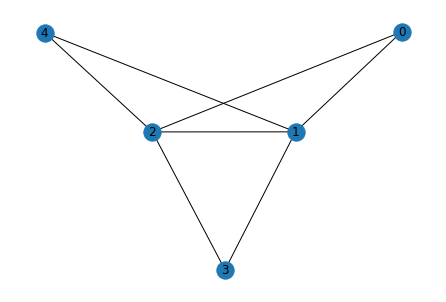

In [24]:
# Recupera Grafo a partir de matriz
H = nx.from_numpy_matrix(A)
print(H)
pos = nx.spring_layout(H)
nx.draw(H,pos,with_labels = True)

## 4. Caminos y ciclos de Euler

### 4.1. Grados: ¿Admite camino y/o ciclo euleriano?

Un grafo admite un ciclo de Euler si es conexo, y el grado de todos sus vertices es par. En forma parecida, un grafo admite un camino de Euler si es conexo, y el grado de todos sus vertices es par salvo el 'inicial' y el 'final' que tienen grado impar.

In [65]:
grados=H.degree()
for i in range(len(grados)):
    print('Grado(',i,')=',grados[i])

Grado( 0 )= 2
Grado( 1 )= 4
Grado( 2 )= 4
Grado( 3 )= 2
Grado( 4 )= 2


### 4.2. ¿Admite camino euleriano?

In [85]:
# Se testea si el grafo admite un camino euleriano desde la librería Networkx.
resCAe=nx.is_semieulerian(H)
print('¿Admite Camino Euleriano? ',resCAe)  

¿Admite Camino Euleriano?  False


In [86]:
if(resCAe):
    CSe=list(nx.eulerian_path(H,source=None))
    print('Camino_Euler=',CAe)
else:
    print('El grafo No admite un Camino de Euler')    

El grafo No admite un Camino de Euler


### 4.3. ¿Admite ciclo euleriano?

In [87]:
# Se testea si el grafo admite un ciclo euleriano desde la librería Networkx.
resCIe=nx.is_eulerian(H)
print('¿Admite Ciclo Euleriano? ',resCIe)

¿Admite Ciclo Euleriano?  True


In [88]:
if(resCIe):
    CIe=list(nx.eulerian_circuit(H,source=None))
    print('Ciclo_Euler=',CIe)
else:
    print('El grafo No admite un Ciclo de Euler')

Ciclo_Euler= [(0, 2), (2, 4), (4, 1), (1, 3), (3, 2), (2, 1), (1, 0)]


## 5. Otros Grafos

### 5.1. Grafos Completos

Un grafo completo, es un grafo que tiene n vértices donde el grado de cada vértice es n-1. En otras palabras, cada vértice está conectado con todos los demás vértices.

In [72]:
# Cargar el valor de n:
n=6
C=nx.complete_graph(n)
pos = nx.spring_layout(C)

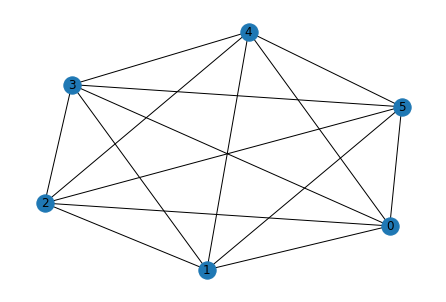

In [75]:
verticesC=list(C.edges)
aristasC=[]    
for i in range(len(verticesC)):
    arista=str('a')+str(verticesC[i][0])+str(verticesC[i][1])
    aristasC.append(arista)
names = []
nx.set_edge_attributes(C, names, "names")
names = aristasC
dfGrafoC=pd.DataFrame(verticesC, columns=["vertices","aristas"])
nx.draw(C,pos,with_labels = True)